# Assignment 1

**Author:** Lorenzo Bozzi

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

**Note:** for a more complete report, look .pdf file attached.
## Exercise 1

> (1 point) Recreate the example shown in slides 10-13 in the Introduction lecture. First, compute the probabilities of obtaining x "heads" out of 30 coin flips using a fair coin (i.e., probability of "heads" = 0.5), where x = 0, ..., 30. Then plot the probabilities p(x) against x. What is the probability of observing 20 or more heads? If you use p ≤ 0.05 as a threshold to reject a null hypothesis, H0 = "the coin is fair" against alternative hypothesis HA = "the coin is not fair," i.e., probability of heads ≠ 0.5, how many heads do you need to observe to reject the null hypothesis? Useful R functions: dbinom, pbinom.


In theory, each coin toss follows a Rademacher process if the coin is unbiased. Let $X_k$ with $k=1,\dots,n$ be the random variables representing the outcome of each toss, and we state that $X_k\in\{0,1\}$, where $1$ corresponds to heads. The probability of having $m$ victories in $30$ tosses follows a binomial distribution(I'll take $p=0.5$ as probability of getting one head):


$$
\mathbb{P}(\{\text{more than 20 heads}\}) = \mathbb{P}\left(\sum_{k=1}^{30}X_k\geq 20\right) = \sum_{k=20}^{30}\binom{30}{k}0.05^{k}0.95^{30-k}\approx0.049
$$

In [1]:
# Function to calculate the probability of getting more than 20 heads in n_tosses
prob_more_than_20_heads <- function(n_tosses) {
  p <- 0.5  # probability of getting heads in a single toss
  k <- 20   # desired number of heads

  # Calculation of cumulative probability
  prob <- 1 - pbinom(k - 1, n_tosses, p)

  return(prob)
}

In [2]:
N <- 30
# Using the function with 30 tosses
probability <- prob_more_than_20_heads(N)

# Print the result
cat("--------------------\n")
cat("Point 1\n")
cat("--------------------\n")
cat("The probability of getting more than 20 heads in 30 tosses is:", probability, "\n")

--------------------
Point 1
--------------------
The probability of getting more than 20 heads in 30 tosses is: 0.04936857 


Let us suppose that we want to decide whether a coin is fair($H_0$) or not.

In [3]:
theta <- 0.5
x <- 0:N

probs <- dbinom(x, size = N, prob = theta)

rejects <- qbinom(0.05, size = N, prob = theta, lower.tail = FALSE)
cat("Number of heads needed to reject the null hypothesis:", rejects, "\n")

Number of heads needed to reject the null hypothesis: 19 


In [4]:
png("histogram.png")
plot(x, probs, type = "h", lwd = 2, col = "purple",
     xlab = "Num. Heads", ylab = "Prob.")
dev.off()

png 
  2

## Exercise 2
>(4 points) Hypothesis testing using t-test and multiple correction. Use set.seed(0511) for setting the seed number.

In [5]:
set.seed(0511)
cat("--------------------\n")
cat("Point 2\n")
cat("--------------------\n")

--------------------
Point 2
--------------------


### Point a 
>(0.5 points) Generate normally distributed expression data for 100 genes for two
groups $A$ and $B$ with 8 replicates for each group, where $\mu_A = \mu_B = 0$ and $\sigma^2_A=\sigma^2_B=3$
Useful R functions: rnorm

In [6]:
n_genes <- 100
n_replicates <- 8
mu_A_B<-0
sd_A_B<-sqrt(3)

# Generate data for group A
data_A <- matrix(rnorm(n_genes * n_replicates, mean = mu_A_B, sd = sd_A_B), nrow = n_genes, ncol = n_replicates)

# Generate data for group B
data_B <- matrix(rnorm(n_genes * n_replicates, mean = mu_A_B, sd = sd_A_B), nrow = n_genes, ncol = n_replicates)


cat("Expression data for group A:\n")
print(head(data_A))


cat("Expression data for group B:\n")
print(head(data_B))

Expression data for group A:
            [,1]       [,2]       [,3]       [,4]       [,5]       [,6]
[1,]  0.03997545  2.0733005 -2.8898691 -0.1895799 -0.2140362 -3.1341510
[2,]  0.85238706  3.2222186 -1.3325066  0.7995441  1.4293917  0.2186847
[3,] -0.96124707  2.3231137 -1.3280215 -1.5803100  1.3522997 -1.0348508
[4,] -0.98026958 -0.4305059  0.6002925  1.1249139  0.6693289  0.5263191
[5,] -1.62220947 -0.1702887  1.2270950  2.4352633  0.8976095  1.8068520
[6,]  0.30679715  1.5305657  0.3553248  0.9436811  2.0224535  1.1026372
           [,7]        [,8]
[1,] -0.3882387  1.13298662
[2,] -0.2167388 -0.05904849
[3,] -0.4949928 -2.62090003
[4,]  1.0616980  1.24152315
[5,] -1.6932495  2.50823088
[6,]  2.5523662 -4.76158323
Expression data for group B:
           [,1]       [,2]       [,3]       [,4]       [,5]       [,6]
[1,]  0.1387761 -0.9340233  3.3300384 -3.6938891  0.8955102  0.8061786
[2,] -0.1852919  1.0312506  0.4301282  0.4175880  1.5951229 -0.7355084
[3,] -0.7348318  0.9835290 -2

### Point b 
>(0.5 points) For each gene, test the null hypothesis, $H_0\colon \mu_A = \mu_B$, using $t$-test
when alternative hypothesis is $H_A$ : $\mu_A \ne \mu_B$ and plot the $p$-values in
a histogram. How many genes have $p \leq 0.05$?
Useful R functions: t.test (use var.equal=TRUE), hist

In [7]:
p_values <- rep(0, n_genes) 

for (i in 1:n_genes) {
  t_test_result <- t.test(data_A[i,], data_B[i,], var.equal = TRUE)
  p_values[i] <- t_test_result$p.value
}

png("histogram2.1.png")

hist(p_values, breaks = 20, main = "Histogram (point b)", xlab = "p-values")
dev.off()

png 
  2

In [8]:
cat("Original p-values:", head(p_values), "\n")

Original p-values: 0.4594068 0.785477 0.585063 0.2034205 0.4977549 0.4927942 


In [9]:
summary(p_values <= 0.05)

   Mode   FALSE    TRUE 
logical      93       7 

As we can see above we've detected 7 genes with $p\leq0.05$.

### Point c
> (0.5 points) Implement the Bonferroni method for adjusting p-values for multiple testing. (You can implement this as an R function, see for example http://www.statmethods.net/management/userfunctions.html). Adjust the $p$-values using your implementation. How many genes have adjusted $p\leq 0.05$? Comment on differences with uncorrected $p$-values, if any. Useful R functions: pmin

From lecture Notes:

- Let $H(1), \ldots, H(m)$ be a collection of hypotheses and $p_1, \ldots, p_m$ the corresponding p-values.
- Let $I_0 \subseteq \{1, \ldots, m\}$ be the (unknown) subset of the true null hypotheses, $m_0 = |I_0| \leq m$

### Bonferroni Correction

- The Bonferroni correction is defined as follows:
  - Given the original significance level $\alpha$ and the number of statistical tests $m$, then Bonferroni correction will reject only those null hypotheses $i$ for which $p_i \leq \frac{\alpha}{m}$.
  - Equivalently, the multiple testing corrected p-value for the $i$-th test is $\min\{m \cdot p_i, 1\}$.
- For the Bonferroni correction method, Family-Wise Error Rate (FWER) $\leq \alpha$ because
  $$
  \text{FWER} = P\left[\bigcup_{i \in I_0} (p_i \leq m \alpha)\right] \leq \alpha
  $$
  (Note: each $p_i \leq m \alpha$ is considered as an event, and the inequality follows from the union bound).
- The Bonferroni correction is conservative


In [10]:
# Bonferroni correction
bonferroni_correction <- function(p_values, alpha = 0.05, prnt = TRUE) {
  m <- length(p_values)
  adjusted_p_values <- pmin(m * p_values, 1)
  rejected <- adjusted_p_values <= alpha
  
  if (prnt) {
    # Printing (just a sample)
    cat("Original p-values:", head(p_values), "\n")
    cat("Adjusted p-values (Bonferroni):", head(adjusted_p_values), "\n")
    cat("Rejected hypotheses (Bonferroni):", sum(rejected), "\n")
    
    genes_with_adjusted_p_leq_0.05_bonferroni <- sum(adjusted_p_values <= 0.05, na.rm = TRUE)
    original_leq_0.05 <- sum(p_values <= 0.05, na.rm = TRUE)
    cat("Number of genes with adjusted (Bonferroni) <= 0.05:", original_leq_0.05 - genes_with_adjusted_p_leq_0.05_bonferroni, "\n")
  }
  
  return(list(adjusted_p_values = adjusted_p_values, rejected = rejected))
}

In [11]:
result_bonferroni <- bonferroni_correction(p_values, alpha=0.05)
adjusted_p_values_bonferroni <- result_bonferroni$adjusted_p_values
rejected_hypotheses_bonferroni <- result_bonferroni$rejected

Original p-values: 0.4594068 0.785477 0.585063 0.2034205 0.4977549 0.4927942 
Adjusted p-values (Bonferroni): 1 1 1 1 1 1 
Rejected hypotheses (Bonferroni): 0 
Number of genes with adjusted (Bonferroni) <= 0.05: 7 


In [12]:
png("histogram2.2.png")

hist(adjusted_p_values_bonferroni, breaks = 20, main = "Histogram (Bonf.)", xlab = "p-values")
dev.off()

png 
  2

In the specific context of our analysis, the application of the Bonferroni correction led to the upward adjustment of all p-values for the seven genes that initially exhibited p-values less than or equal to 0.05. This conservative nature of the correction method is evident in its tendency to increase p-values, often resulting in a more stringent significance threshold. Consequently, in our case, this adjustment resulted in categorizing all genes as significant, emphasizing the cautious and stringent nature of the Bonferroni correction.

### Point d
>(1 point) Same as (c), but implement the Benjamini-Hochberg method. Adjust the p-values using your implementation. How many genes have adjusted p ≤ 0.05? Comment on differences with uncorrected p-values,
if any. Useful R functions: order, pmin, min.

From lecture notes

▶ The Benjamini-Hochberg (BH) step-up procedure is commonly used in bioinformatics applications
▶ Let $q \in [0,1]$ be given and $p(1) \leq p(2) \leq \ldots \leq p(m)$ be the ordered list of the $m$ p-values, then the BH procedure works as follows:
  1. Find the largest $k$ such that $p(k) \leq \frac{kq}{m}$
  2. Then reject all $H(i)$ for $i = 1, \ldots, k$
▶ For BH, the probability of the expected proportion of false positives $\leq q$
▶ The FDR value $q_k$ for each test $k$ can be obtained from mapping $\min\left(\frac{mk}{p(k)}, 1\right)$ (and by guaranteeing that FDR values do not decrease as $k$ increases)

In [13]:
bh_correction <- function(p_values, alpha = 0.05, prt = TRUE) {
  
  # Get the number of p-values
  n = length(p_values)
  
  # Convert p-values to numeric (if not already)
  p_values <- as.numeric(p_values)
  
  # Initialize adjusted p-values with the original p-values
  p_adjusted <- p_values
  
  # Check for missing values in p_values
  if (all(nna <- !is.na(p_values))) nna <- TRUE
  p_values <- p_values[nna]
  lp <- length(p_values)
  
  # Ensure that the length of p_values is not greater than n
  stopifnot(n >= lp)
  
  # Rank p-values in descending order
  i <- lp:1L
  order <- order(p_values, decreasing = TRUE)
  ro <- order(order)#needed to preserve order
  
  # Calculate adjusted p-values using Benjamini-Hochberg method
  p_adjusted[nna] <- pmin(1, cummin(n / i * p_values[order]))[ro]
  
  # Count the number of rejected hypotheses (p_adjusted < alpha)
  rejected = sum(p_adjusted < alpha, na.rm = TRUE)
  
  # Print results if prt is TRUE
  if (prt) {
    # Printing (just a sample)
    #cat("Original p-values:", head(p_values), "\n")
    cat("Adjusted p-values (BH):", head(p_adjusted), "\n")
    cat("Rejected hypotheses (BH):", rejected, "\n")
  }
  
  # Return a list containing adjusted p-values and the number of rejected hypotheses
  return(list(adjusted_p_values = p_adjusted, rejected = rejected))
}

Adjusted p-values (BH): 0.9188137 0.9634508 0.9535794 0.816226 0.9217683 0.9217683 
Rejected hypotheses (BH): 0 


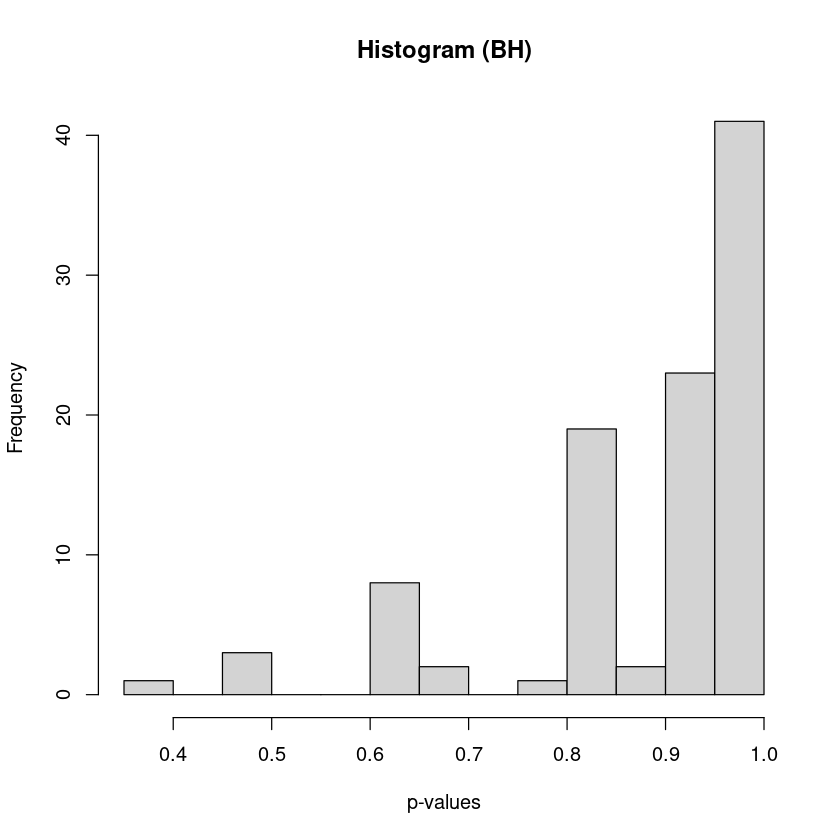

In [14]:
result_bh <- bh_correction(p_values)

adjusted_p_values_bh <- result_bh$adjusted_p_values
rejected_hypotheses_bh <- result_bh$rejected


hist(adjusted_p_values_bh, breaks = 20, main = "Histogram (BH)", xlab = "p-values")

In this case, the Benjamin correction was applied. It is noteworthy that all p-values were adjusted, primarily increased, encompassing those 7 genes that had initially been identified as having limited significance by the initial p-test ($p \leq 0.05$). Despite being less conservative than the Bonferroni correction, this method substantiates the same outcomes. The fact that both correction methods led to the same set of genes being identified suggests that the genes in question may have marginal significance, and the adjustment did not provide enough evidence to reject the null hypothesis for these genes. This is not necessarily an indication of false negatives.

### Point e 
>(0.5 points) Generate expression values for 80 genes for groups A and B, where $\mu_A = \mu_B = 0$ and $\sigma^2_A=\sigma^2_B=3$ with 8 replicates for each group. Generate similar expression values for 20 genes but with $\mu_A = 0$, $\mu_B = 4$ and $\sigma^2_A=\sigma^2_B=3$.

In [15]:
n_genes_new=80
n_genes_new1=20
n_replicates_new=8
mu_A_new=0
mu_B_new1=4
sd_new=sqrt(3)

In [16]:
#GROUP A
tmp1= matrix(rnorm(n_genes_new * n_replicates_new, mean = mu_A_new, sd = sd_new), nrow = n_genes_new, ncol = n_replicates_new)
tmp2=matrix(rnorm(n_genes_new1 * n_replicates_new, mean = mu_A_new, sd = sd_new), nrow = n_genes_new1, ncol = n_replicates_new)

data_A_new <- rbind(tmp1, tmp2)

# Print dimensions
cat("Dimensions of tmp1 matrix:", dim(tmp1), "\n")
cat("Dimensions of tmp2 matrix:", dim(tmp2), "\n")
cat("Dimensions of group_A_data matrix:", dim(data_A_new), "\n")

Dimensions of tmp1 matrix: 80 8 
Dimensions of tmp2 matrix: 20 8 
Dimensions of group_A_data matrix: 100 8 


In [17]:
#GROUP B
tmp1= matrix(rnorm(n_genes_new * n_replicates_new, mean = mu_A_new, sd = sd_new), nrow = n_genes_new, ncol = n_replicates_new)
tmp2=matrix(rnorm(n_genes_new1 * n_replicates_new, mean = mu_B_new1, sd = sd_new), nrow = n_genes_new1, ncol = n_replicates_new)

data_B_new <- rbind(tmp1, tmp2)

# Print dimensions
cat("Dimensions of tmp1 matrix:", dim(tmp1), "\n")
cat("Dimensions of tmp2 matrix:", dim(tmp2), "\n")
cat("Dimensions of group_B_data matrix:", dim(data_B_new), "\n")

Dimensions of tmp1 matrix: 80 8 
Dimensions of tmp2 matrix: 20 8 
Dimensions of group_B_data matrix: 100 8 


## Point f
>(0.5 points) For each gene, test the null hypothesis,$H_0 \colon \mu_A = \mu_B$, using $t$-test, when alternative hypothesis is $H_A\colon \mu_A \ne \mu_B$ and when alternative hypothesis is $H_A\colon \mu_A<\mu_B$. How many genes have $p \leq 0.05$? Use var.equal=TRUE argument with t.test function. Correct the p-values for multiple testing using your implementation of both methods. How many genes have adjusted $p \leq 0.05$? Comment on differences, if any.

### Part 1

In this case we deal with $H_0 \colon \mu_A = \mu_B$ and $H_A\colon \mu_A \ne \mu_B$ corresponding to a two-side $t$-test.

In [29]:
### two sided t-test

n_genes <- nrow(data_A_new)
p_values_two_tailed <- rep(0, n_genes)

  for (i in 1:n_genes) {
    t_test_result <- t.test(data_A_new[i,], data_B_new[i,], var.equal = TRUE, alternative = "two.sided")
    p_values_two_tailed[i] <- t_test_result$p.value
  }

cat("p-values:", head(p_values_two_tailed), "\n")
cat("N. genes with p<0.05", sum(p_values_two_tailed <= 0.05, na.rm = TRUE),"\n")

#now i split the groups
p_values_part1 <- head(p_values_two_tailed, 80)
p_values_part2 <- tail(p_values_two_tailed, 20)

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1 <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2 >= 0.05, na.rm = TRUE),"\n")

p-values: 0.2009571 0.7263125 0.3538697 0.5854655 0.6701983 0.6144207 
N. genes with p<0.05 26 
N. genes false positive 6 
N. genes false negative 0 


In [46]:
### two sided t-test

n_genes <- nrow(data_A_new)
p_values_two_tailed <- rep(0, n_genes)

  for (i in 1:n_genes) {
    t_test_result <- t.test(data_A_new[i,], data_B_new[i,], var.equal = TRUE, alternative = "two.sided")
    p_values_two_tailed[i] <- t_test_result$p.value
  }

cat("p-values:", head(p_values_two_tailed), "\n")
cat("N. genes with p<0.05", sum(p_values_two_tailed <= 0.05, na.rm = TRUE),"\n")

#now i split the groups
p_values_part1 <- head(p_values_two_tailed, 80)
p_values_part2 <- tail(p_values_two_tailed, 20)

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1 <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2 >= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part2: we have false negative
cat("N. genes true positive", sum(p_values_part2 <= 0.05, na.rm = TRUE),"\n")

false_positive=sum(p_values_part1 <= 0.05, na.rm = TRUE)
true_positives=sum(p_values_part2 <= 0.05, na.rm = TRUE)


cat('\n\n---------------------------\n')
cat('        BONFERRONI              \n')
cat('---------------------------\n')

#I use bonferroni
result_bonf <- bonferroni_correction(p_values_two_tailed,prnt = FALSE)
adjusted_p_values_bonf_tow_tailed <- result_bonf$adjusted_p_values

p_values_part1_bonf <- head(adjusted_p_values_bonf_tow_tailed, 80)
p_values_part2_bonf <- tail(adjusted_p_values_bonf_tow_tailed, 20)

cat("p-values:", head(adjusted_p_values_bonf_tow_tailed ), "\n")
cat("N. genes with p<0.05", sum(adjusted_p_values_bonf_tow_tailed  <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1_bonf <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2_bonf >= 0.05, na.rm = TRUE),"\n")
# if H0 is rejected in part2: we have false negative
cat("N. genes true positive", sum(p_values_part2_bonf <= 0.05, na.rm = TRUE),"\n")

false_positive=sum(p_values_part1_bonf <= 0.05, na.rm = TRUE)
true_positives=sum(p_values_part2_bonf <= 0.05, na.rm = TRUE)

cat('\n\n---------------------------\n')
cat('            BH              \n')
cat('---------------------------\n')
#I use BH
result_bh <- bh_correction(p_values_two_tailed, prt = FALSE)
adjusted_p_values_bh_tow_tailed <- result_bh$adjusted_p_value

p_values_part1_bh <- head(adjusted_p_values_bh_tow_tailed, 80)
p_values_part2_bh <- tail(adjusted_p_values_bh_tow_tailed, 20)

cat("N. genes with p<0.05", sum(adjusted_p_values_bh_tow_tailed  <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1_bh <= 0.05, na.rm = TRUE),"\n")

# if H0 is accepted in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2_bh >= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part2: we have false negative
cat("N. genes true positive", sum(p_values_part2_bh <= 0.05, na.rm = TRUE),"\n")

false_positive=sum(p_values_part1_bh <= 0.05, na.rm = TRUE)
true_positives=sum(p_values_part2_bh <= 0.05, na.rm = TRUE)

p-values: 0.2009571 0.7263125 0.3538697 0.5854655 0.6701983 0.6144207 
N. genes with p<0.05 26 
N. genes false positive 6 
N. genes false negative 0 
N. genes true positive 20 
FDR 0.2307692 


---------------------------
        BONFERRONI              
---------------------------
p-values: 1 1 1 1 1 1 
N. genes with p<0.05 7 
N. genes false positive 0 
N. genes false negative 13 
N. genes true positive 7 
FDR 0 


---------------------------
            BH              
---------------------------
N. genes with p<0.05 19 
N. genes false positive 0 
N. genes false negative 1 
N. genes true positive 19 
FDR 0 


### Part 2

In this case we deal with $H_0 \colon \mu_A = \mu_B$ and $H_A\colon \mu_A < \mu_B$ corresponding to a one-side $t$-test.

In [43]:
### two sided t-test

n_genes <- nrow(data_A_new)
p_values_two_tailed <- rep(0, n_genes)

  for (i in 1:n_genes) {
    t_test_result <- t.test(data_A_new[i,], data_B_new[i,], var.equal = TRUE, alternative = "less")
    p_values_two_tailed[i] <- t_test_result$p.value
  }

cat("p-values:", head(p_values_two_tailed), "\n")
cat("N. genes with p<0.05", sum(p_values_two_tailed <= 0.05, na.rm = TRUE),"\n")

#now i split the groups
p_values_part1 <- head(p_values_two_tailed, 80)
p_values_part2 <- tail(p_values_two_tailed, 20)

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1 <= 0.05, na.rm = TRUE),"\n")

false_negative=sum(p_values_part2 >= 0.05, na.rm = TRUE)
# if H0 is rejected in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2 >= 0.05, na.rm = TRUE),"\n")

true_positives=sum(p_values <= 0.05, na.rm = TRUE)
cat("N. genes true_positives", sum(p_values_part2 >= 0.05, na.rm = TRUE),"\n")


cat('\n\n---------------------------\n')
cat('        BONFERRONI              \n')
cat('---------------------------\n')

#I use bonferroni
result_bonf <- bonferroni_correction(p_values_two_tailed,prnt = FALSE)
adjusted_p_values_bonf_tow_tailed <- result_bonf$adjusted_p_values

p_values_part1_bonf <- head(adjusted_p_values_bonf_tow_tailed, 80)
p_values_part2_bonf <- tail(adjusted_p_values_bonf_tow_tailed, 20)

cat("p-values:", head(adjusted_p_values_bonf_tow_tailed ), "\n")

cat("N. genes with p<0.05", sum(adjusted_p_values_bonf_tow_tailed  <= 0.05, na.rm = TRUE),"\n")

false_positive=sum(p_values_part1_bonf <= 0.05, na.rm = TRUE)
# if H0 is rejected in part1: we have false positive
cat("N. genes false positive",false_positive ,"\n")

false_negative=sum(p_values_part2_bonf >= 0.05, na.rm = TRUE)
# if H0 is rejected in part2: we have false negative
cat("N. genes false negative",false_negative ,"\n")

# if H0 is rejected in part2: is ok
true_positives=sum(p_values_part2_bonf <= 0.05, na.rm = TRUE)
cat("N. genes true positive",false_negative ,"\n")

cat('\n\n---------------------------\n')
cat('            BH              \n')
cat('---------------------------\n')
#I use BH
result_bh <- bh_correction(p_values_two_tailed, prt = FALSE)
adjusted_p_values_bh_tow_tailed <- result_bh$adjusted_p_value

p_values_part1_bh <- head(adjusted_p_values_bh_tow_tailed, 80)
p_values_part2_bh <- tail(adjusted_p_values_bh_tow_tailed, 20)

false_positive=sum(p_values_part1_bh <= 0.05, na.rm = TRUE)

cat("N. genes with p<0.05", sum(adjusted_p_values_bh_tow_tailed  <= 0.05, na.rm = TRUE),"\n")

# if H0 is rejected in part1: we have false positive
cat("N. genes false positive", sum(p_values_part1_bh <= 0.05, na.rm = TRUE),"\n")

false_negative=sum(p_values_part2_bh >= 0.05, na.rm = TRUE)
# if H0 is rejected in part2: we have false negative
cat("N. genes false negative", sum(p_values_part2_bh >= 0.05, na.rm = TRUE),"\n")

true_positives=sum(p_values_part2_bonf <= 0.05, na.rm = TRUE)
cat("N. genes true positive",sum(p_values_part2_bh <= 0.05, na.rm = TRUE) ,"\n")

p-values: 0.8995214 0.6368438 0.8230651 0.2927328 0.6649008 0.6927896 
N. genes with p<0.05 27 
N. genes false positive 7 
N. genes false negative 0 
N. genes true_positives 0 
FDR 0.125 


---------------------------
        BONFERRONI              
---------------------------
p-values: 1 1 1 1 1 1 
N. genes with p<0.05 12 
N. genes false positive 0 
N. genes false negative 8 
N. genes true positive 8 
FDR 0 


---------------------------
            BH              
---------------------------
N. genes with p<0.05 21 
N. genes false positive 1 
N. genes false negative 0 
N. genes true positive 20 
FDR 0.07692308 


Both tests exhibit similar outcomes between Bonferroni and Benjamini-Hochberg.

## Point g
>(0.5 points) As in point (f), for each gene, test the null hypothesis, $H_0 : \mu_A = \mu_B$, using $t$-test, when alternative hypothesis is $H_A: \mu_A ̸= \mu_B$. Correct the $p$-values for multiple testing using your implementation of both methods. Empirically estimate the false discovery rate (FDR) for both methods. Similarly, for both methods check whether you have made at least one false discovery (recall the definition of family-wise error rate FWER). Repeat this analysis for 100 (or more) randomly generated datasets and report you average FDR and FWER values. Are your average FDR and FWER values close to what they should be?

In [76]:
create_random_datasets <- function(num_datasets, n_genes, n_genes_group1, n_replicates, mu_A, mu_B, sd_value) {
  
  # Set default values if parameters are not provided
  num_datasets <- if (missing(num_datasets)) 100 else num_datasets
  n_genes <- if (missing(n_genes)) 80 else n_genes
  n_genes_group1 <- if (missing(n_genes_group1)) 20 else n_genes_group1
  n_replicates <- if (missing(n_replicates)) 8 else n_replicates
  mu_A <- if (missing(mu_A)) 0 else mu_A
  mu_B <- if (missing(mu_B)) 4 else mu_B
  sd_value <- if (missing(sd_value)) sqrt(3) else sd_value

  dataset_list <- list()
  
  # Remove the seed to obtain random variations
  set.seed(NULL)
  
  FWR_mean_bonf <- 0
  FDR_mean_bonf <- 0
  FWR_mean_bh <- 0
  FDR_mean_bh <- 0

  for (i in 1:num_datasets) {
    FWR_bonf <- 0
    FDR_bonf <- 0
    FWR_bh <- 0
    FDR_bh <- 0

    # Group A
    tmp1_A <- matrix(rnorm(n_genes * n_replicates, mean = mu_A, sd = sd_value), nrow = n_genes, ncol = n_replicates)
    tmp2_A <- matrix(rnorm(n_genes_group1 * n_replicates, mean = mu_A, sd = sd_value), nrow = n_genes_group1, ncol = n_replicates)
    data_A <- rbind(tmp1_A, tmp2_A)

    # Group B
    tmp1_B <- matrix(rnorm(n_genes * n_replicates, mean = mu_A, sd = sd_value), nrow = n_genes, ncol = n_replicates)
    tmp2_B <- matrix(rnorm(n_genes_group1 * n_replicates, mean = mu_B, sd = sd_value), nrow = n_genes_group1, ncol = n_replicates)
    data_B <- rbind(tmp1_B, tmp2_B)

    # perform two-tailed p test
    p_values <- numeric(n_genes)
    for (j in 1:n_genes) {
      t_test_result <- t.test(data_A[j,], data_B[j,], var.equal = TRUE, alternative = "less")
      p_values[j] <- t_test_result$p.value
    }
      
    #compute bonferroni
    tmp <- bonferroni_correction(p_values, prnt = FALSE)
    p_bonf <- tmp$adjusted_p_value
  
    upper_group <- head(p_bonf, 80)
    lower_group <- tail(p_bonf, 20)
  
    err_bonf <- sum(upper_group <= 0.05, na.rm = TRUE)
    FDR_bonf <- 0
    if (sum(p_bonf <= 0.05, na.rm = TRUE) > 0) {
        FDR_bonf <- err_bonf / sum(p_bonf <= 0.05, na.rm = TRUE)
    }
    
    FDR_mean_bonf <- FDR_mean_bonf + FDR_bonf 
  
    FWR_bonf <- err_bonf+sum(lower_group <= 0.05, na.rm = TRUE)
    FWR_mean_bonf <- FWR_mean_bonf + FWR_bonf
      
    #compute BH
    tmp <- bh_correction(p_values, prt = FALSE)
    p_bh <- tmp$adjusted_p_value
  
    upper_group <- head(p_bh, 80)
    lower_group <- tail(p_bh, 20)
  
    err_bh <- sum(upper_group <= 0.05, na.rm = TRUE)
  
    FDR_bh <- 0
      
    if (sum(p_bh <= 0.05, na.rm = TRUE) > 0) {
         FDR_bh <- err_bh / sum(p_bh <= 0.05, na.rm = TRUE)
    }
      
    FDR_mean_bh <- FDR_mean_bh + FDR_bh
  
    # Calcola l'FWR
    FWR_bh <- err_bh+sum(lower_group <= 0.05, na.rm = TRUE)
    FWR_mean_bh <- FWR_mean_bh + FWR_bh
    
    

    # Store the dataset in the list
    dataset_list[[i]] <- list(group_A = data_A, group_B = data_B)
  }
    
  #compute means
  FDR_mean_bonf <- FDR_mean_bonf / num_datasets
  FWR_mean_bonf <- FWR_mean_bonf / num_datasets
  FDR_mean_bh <- FDR_mean_bh / num_datasets
  FWR_mean_bh <- FWR_mean_bh / num_datasets

  return(list(FDR_mean_bonf = FDR_mean_bonf, FWR_mean_bonf = FWR_mean_bonf, FDR_mean_bh = FDR_mean_bh, FWR_mean_bh = FWR_mean_bh))
}

# Utilizzo della funzione
my_datasets <- create_random_datasets()

results <- create_random_datasets()
print(results)

$FDR_mean_bonf
[1] 0.04

$FWR_mean_bonf
[1] 0.07

$FDR_mean_bh
[1] 0.04

$FWR_mean_bh
[1] 0.07

